In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from hpsklearn import HyperoptEstimator, pca, min_max_scaler, standard_scaler
from hpsklearn import xgboost_classification, random_forest, ada_boost, gradient_boosting, extra_trees
from hpsklearn import svc, svc_linear, svc_rbf, svc_poly, svc_sigmoid, liblinear_svc
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe, hp
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
df = pd.read_csv('Data/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [10]:
X = df.drop('Class',axis=1)
y = df['Class']

In [11]:
y.shape

(284807,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [13]:
preproc = hp.choice('myprepros_name', 
                    [
                        [min_max_scaler('myprepros_name.only_norm')],
                        [standard_scaler('myprepros_name.only_std_scaler')],
                        [pca('myprepros_name.only_pca')],
                        [pca('myprepros_name.pca'), min_max_scaler('myprepros_name.norm')],
                        [min_max_scaler('myprepros_name.first_norm'), standard_scaler('myprepros_name.second_std_scaler')],
                        []
                    ])

In [14]:
clf = hp.choice( 'model_name',
            [ random_forest ('model_name.random_forest'),
            ada_boost ('model_name.ada_boost'),
            gradient_boosting ('model_name.gradient_boosting'),
            xgboost_classification ('model_name.xgboost_classification'),
            extra_trees('model_name.extra_trees'),
            svc_linear('model_name.svc_linear'),
            svc_rbf('model_name.svc_rbf'),
            svc('model_name.svc')]) 

In [15]:
#preprocessing=[min_max_scaler('norm_scaler'), pca('my_pca') ]
#classifier=xgboost_classification('xgboost')
#preprocessing=any_preprocessing('pre')
#preprocessing = preproc
#classifier=any_classifier('cla')
#classifier=clf

#01. 100 times with classifier=any_classifier('cla') & preprocessing=any_preprocessing('pre')

#02. 100 times with classifier=clf & preprocessing = preproc

#03. 100 times with classifier=xgboost_classification('xgboost') & preprocessing = preproc

#04. 100 times with classifier=xgboost_classification('xgboost') & preprocessing = any_preprocessing('pre')

In [16]:
init_time = datetime.now()
accuracy = 0
best_model = None
#for i in range(100):
    #print (i)
model = HyperoptEstimator(  classifier=any_classifier('cla'), 
                                preprocessing=any_preprocessing('pre'), 
                                algo=tpe.suggest, 
                                max_evals=100, 
                                trial_timeout=1500)
    # perform the search
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
    #if acc > accuracy:
        #accuracy = acc
        #best_model = model
        #print (accuracy)

fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))

100%|██████████| 100/100 [06:46<00:00,  4.07s/trial, best loss: 0.0004263536729114392]
Execution time :  11:34:59.565273


In [17]:
# summarize the best model
print("Accuracy: %.3f" % acc)
print(model.best_model())

Accuracy: 1.000
{'learner': RandomForestClassifier(max_features='sqrt', n_estimators=781, n_jobs=1,
                       random_state=0, verbose=False), 'preprocs': (), 'ex_preprocs': ()}


In [33]:
init_time = datetime.now()
model = ExtraTreesClassifier(criterion='entropy', max_features=0.3901684099941361,
                     n_estimators=122, n_jobs=1, random_state=0, verbose=False)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
#print(f"F-measure of XGB: {mean(scores):.3f}")
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))

Execution time :  0:00:26.437672


In [34]:
f1_score = round(f1_score(y_test, prediction), 2)
recall_score = round(recall_score(y_test, prediction), 2)
print("Sensitivity/Recall: {recall_score}".format(recall_score = recall_score))
print("F1 Score: {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall: 0.77
F1 Score: 0.86


In [35]:
print(classification_report(y_test, prediction))

precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.77      0.86       148

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



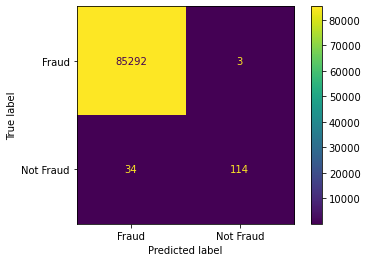

In [37]:
#class_names = {0:'Not Fraud', 1:'Fraud'}
plot_confusion_matrix(model, X_test, y_test, values_format='d', display_labels=["Not Fraud","Fraud"]);

In [18]:
init_time = datetime.now()
model = RandomForestClassifier(max_features='sqrt', n_estimators=781, n_jobs=1,
                       random_state=0, verbose=False)
#pipeline = Pipeline(steps=[('norm', StandardScaler(with_mean=False)), ('m', model)])
model.fit(X_train, y_train)
prediction = model.predict(X_test)
#print(f"F-measure of XGB: {mean(scores):.3f}")
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))

Execution time :  0:27:03.944571


In [19]:
f1_score = round(f1_score(y_test, prediction), 2)
recall_score = round(recall_score(y_test, prediction), 2)
print("Sensitivity/Recall: {recall_score}".format(recall_score = recall_score))
print("F1 Score: {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall: 0.77
F1 Score: 0.85


In [20]:
print(classification_report(y_test, prediction))

precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.77      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



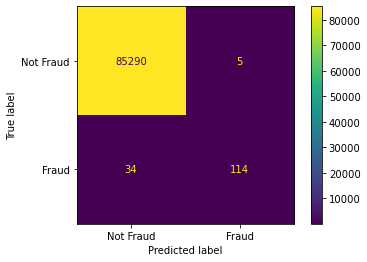

In [22]:
plot_confusion_matrix(model, X_test, y_test, values_format='d', display_labels=["Not Fraud","Fraud"]);